In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
import csv 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison


# Índice Interactivo
## 1. [Introducción](#introducción)
   - [Contexto del estudio](#contexto-del-estudio)
   - [Objetivos de la investigación](#objetivos-de-la-investigación)
   - [Análisis y preparación variables](#Análisis-y-preparación-variables)
   - [Creación Submuestras](#Creación-Submuestras)
   
## 2. [Metodología](#metodología)
   - [Estadísticos Descriptivos](##Estadísticos-Descriptivos)
   - **Principales estadísticos a analizar:**
      - Desviación típica
      - Coeficiente de variación
      - Boxplot
      - Histogramas
      - Gráfico densidad
      - QQ plot
   - [Estadísticos de Inferencia](#estadísticos-de-inferencia)
   - **Principales estadísticos a analizar:**
      - Pruebas t (para comparaciones de dos grupos)
      - Intervalos de confianza
      - P valor
      - Análisis de varianza (ANOVA) (para comparaciones de más de dos grupos)
      

## 3. [Análisis descriptivo](#análisis-descriptivo)
   - [Medidas posición y dispersión](#Medidas-posición-y-dispersión)
   - [Gráficos de densidad](#GRÁFICOS-DE-DENSIDAD)
   - [Boxplots](#Boxplots)

## 4. [Análisis inferencial](#análisis-inferencial)
   - [Medias de las calificaciones finales G3 por intervalo de confianza](#medias-de-las-calificaciones-finales-G3-por-intervalo-de-confianza)
   - [Estudio normalidad-g3](#estudio-normalidad-g3)
   - [Homocedasticidad](#homocedasticidad)
   - [T-TEST](#T-TEST)
   - [ANOVA](#ANOVA)
   - [POST-HOC](#POST-HOC)

## 5. [Resultados y Conclusiones](#resultados)
   - [Resultados](#Resultados)
   - [Conclusiones](#conclusiones)
 
   


In [2]:
ruta_csv = 'student-por.csv'
df = pd.read_csv(ruta_csv, delimiter = ';')
dfc = df.drop(['address', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime','studytime', 'failures','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime', 'Dalc', 'Walc','absences', 'health', 'G1', 'G2' ],axis=1)
print(dfc.head())

  school sex  age Pstatus guardian romantic  goout  G3
0     GP   F   18       A   mother       no      4  11
1     GP   F   17       T   father       no      3  11
2     GP   F   15       T   mother       no      2  12
3     GP   F   15       T   mother      yes      2  14
4     GP   F   16       T   father       no      2  13


# 1. INTRODUCCIÓN

## Contexto del estudio

>En el panorama educativo contemporáneo, el rendimiento académico de los estudiantes se ve influenciado por una amplia gama de factores personales, sociales y educativos. Este estudio se centra en una muestra de estudiantes de dos escuelas secundarias en Portugal, explorando cómo diversos aspectos de su vida y sus elecciones personales pueden afectar sus calificaciones finales. En particular, el análisis se enfoca en las variables demográficas (como el género y la edad), el contexto social (como la frecuencia de salidas con amigos y la presencia de una relación romántica), y los resultados académicos representados por las calificaciones finales.

>La investigación busca profundizar en la comprensión de cómo estos factores interactúan entre sí y contribuyen al éxito o las dificultades académicas de los estudiantes. Al examinar la escuela a la que asisten los estudiantes, podemos explorar también el papel que juega el entorno educativo en sus logros. La presencia de relaciones románticas, el tiempo dedicado a socializar con amigos y las características demográficas son dimensiones que ofrecen una visión integral del estudiante como individuo dentro y fuera del aula.

# Objetivos de la investigación

## Objetivo General
- Evaluar el impacto de factores personales y sociales, como el género, la edad, la presencia de relaciones románticas, y la frecuencia de salidas con amigos, en el rendimiento académico de los estudiantes de dos escuelas secundarias en Portugal.

## Objetivos Específicos

Analizar la relación entre el género del estudiante y su rendimiento académico, para identificar si existen diferencias significativas en las calificaciones finales entre estudiantes masculinos y femeninos.

- Estudiar el efecto de la edad en el rendimiento académico, determinando cómo varían las calificaciones finales en función de la edad de los estudiantes.

- Evaluar el impacto de las relaciones románticas en las calificaciones finales, comparando el rendimiento académico entre estudiantes que están en una relación romántica y aquellos que no lo están.

- Examinar la influencia de la socialización con amigos (goout) en el rendimiento académico, para entender cómo el tiempo dedicado fuera de casa con amigos afecta las calificaciones finales de los estudiantes.

- Comparar el rendimiento académico entre las dos escuelas participantes, identificando si la institución educativa a la que asisten los estudiantes tiene un impacto significativo en sus resultados académicos




# Análisis y preparación variables
> Se eliminan las variables que no pensamos considerar en el analisis inicial.

>**Nombre Variable** : school , **Tipo** : Categórica nominativa  , **Descripción** : Escuela del estudiante (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira).

>**Nombre Variable** : sex , **Tipo** : Categórica nominativa , **Descripción** : Género del estudiante (binario: 'F' - femenino o 'M' - masculino).

>**Nombre Variable** : age , **Tipo** :Cuantitativa Discreta , **Descripción** : Edad del estudiante (numérica: de 15 a 22).

>**Nombre Variable** : romantic , **Tipo** : Categórica nominativa , **Descripción** : Con una relación romántica (binario: sí o no).

>**Nombre Variable** : goout , **Tipo** : Categórica nominativa , **Descripción** : Salir con amigos (numérico: de 1 - muy bajo a 5 - muy alto).

>**Nombre Variable** : G3	 , **Tipo** : Cuantitativa Discreta , **Descripción** : Nota final (numérica: de 0 a 20).

In [3]:
frequency_table = pd.crosstab(index=df['romantic'], columns="count")
frequency_table['percentage'] = (frequency_table / frequency_table.sum()) * 100

print(frequency_table)

col_0     count  percentage
romantic                   
no          410   63.174114
yes         239   36.825886


# CREACIÓN SUBMUESTRAS
>Separamos los datos de nuestra muestra por Hombres/Mujeres y por centros de estudios para comprobar si las medidas de posición y dispersión muestrales se comportan igual en los diferentes subgrupos.

In [4]:
dfcF = dfc[dfc['sex'] == 'F']
dfcM = dfc[dfc['sex'] == 'M']
dfcGP = dfc[dfc['school']=='GP']
dfcMS = dfc[dfc['school']=='MS']

# GRÁFICO TARTA HOMBRES / MUJERES

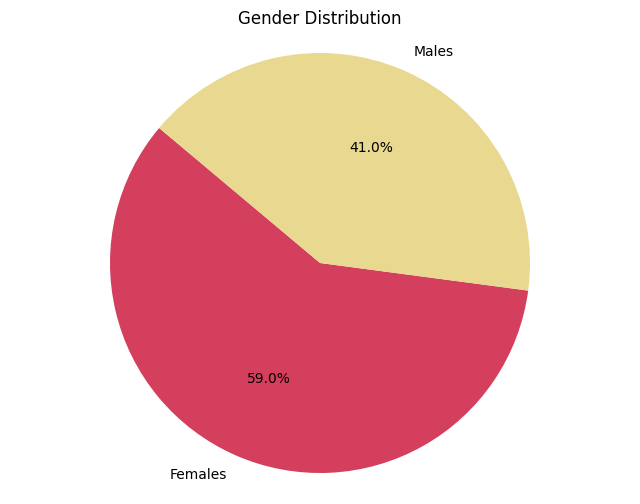

In [5]:
import matplotlib.pyplot as plt

# Suponiendo que 'dfcF' y 'dfcM' son DataFrames de pandas

# Contar el número de observaciones para cada categoría
num_females = dfcF.shape[0]
num_males = dfcM.shape[0]

# Etiquetas para las secciones de la tarta
labels = ['Females', 'Males']

# Datos para las secciones de la tarta
sizes = [num_females, num_males]

# Colores para las secciones de la tarta
colors = ['#d43f5d', '#e8d890']

# Crear el gráfico de tarta
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Aspecto circular
plt.title('Gender Distribution')  # Título del gráfico
plt.show()


>El gráfico de tarta muestra la distribución de género de los estudiantes, con las mujeres representadas en rojo y los hombres en amarillo. Según el gráfico:

- 59.0% de la muestra son mujeres.
- 41.0% de la muestra son hombres.
  
> Esto indica una mayor proporción de mujeres en la muestra en comparación con los hombres. 

# GRÁFICO TARTA Gabriel Pereira  / Mousinho da Silveira 

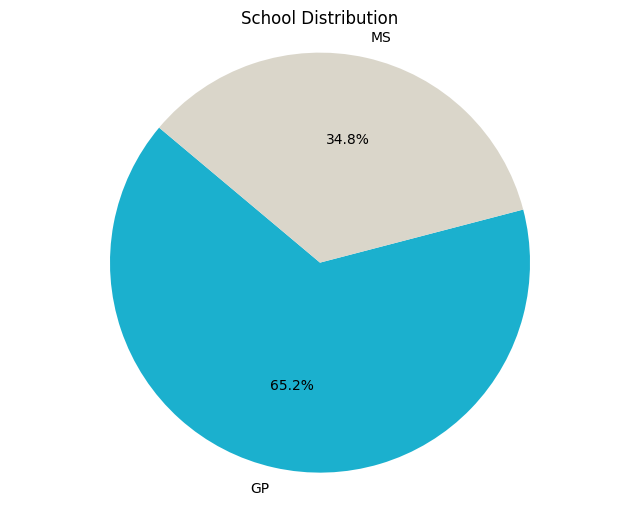

In [6]:
import matplotlib.pyplot as plt

# Suponiendo que 'dfcGP' y 'dfcMS' son DataFrames de pandas

# Contar el número de observaciones para cada categoría
num_gp = dfcGP.shape[0]
num_ms = dfcMS.shape[0]

# Etiquetas para las secciones de la tarta
labels = ['GP', 'MS']

# Datos para las secciones de la tarta
sizes = [num_gp, num_ms]

# Colores para las secciones de la tarta
colors = ['#1bb0ce', '#dad6ca']

# Crear el gráfico de tarta
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Aspecto circular
plt.title('School Distribution')  # Título del gráfico
plt.show()


>El gráfico de tarta muestra la distribución de estudiantes entre las dos escuelas, Gabriel Pereira (GP) y Mousinho da Silveira (MS). Según el gráfico:
- 65.2% de la muestra son estudiantes de Gabriel Pereira (GP).
- 34.8% pertenecen a Mousinho da Silveira (MS).
Este desglose muestra que hay una mayor cantidad de estudiantes de Gabriel Pereira en la muestra en comparación con Mousinho da Silveira. 

# 2. Metodología

## Estadísticos Descriptivos
- Desviación típica:
      La desviación típica es una medida que cuantifica la dispersión o variabilidad de los datos respecto a su media. Indica, en promedio, cuánto se desvían los valores individuales de la media del conjunto. Por ejemplo, si la desviación típica de las calificaciones de un grupo de estudiantes es baja, significa que la mayoría de las calificaciones están cerca del promedio de calificaciones. Si es alta, las calificaciones están más dispersas, variando significativamente del promedio.

- Coeficiente de variación:
      El coeficiente de variación (CV) es una herramienta útil para comparar la variabilidad entre conjuntos de datos con diferentes unidades de medida o medias. Se calcula como la desviación típica dividida por la media de los datos, esta comprendido entre -1 y 1. Un CV alto indica una mayor variabilidad relativa de los datos, independientemente de la escala de los datos. Es particularmente útil para comparar la dispersión en conjuntos de datos donde, por ejemplo, los rangos de valores son sustancialmente diferentes.

- Coecifiente de correlación:
      El coeficiente de correlación es una medida estadística que cuantifica la relación o asociación entre dos variables. Resume la fuerza y dirección de esta relación en un solo valor que generalmente varía entre -1 y 1. Aquí hay un breve resumen de sus características clave:
            Valor -1: Correlación negativa perfecta. A medida que una variable aumenta, la otra disminuye de manera proporcional.
            Valor 1: Correlación positiva perfecta. Ambas variables se mueven en la misma dirección al mismo ritmo.
            Valor 0: No hay correlación lineal. Las variables no muestran una relación lineal.
      
- Boxplot:
      El boxplot o diagrama de caja visualiza la distribución de los datos a través de cuartiles, destacando la mediana (segundo cuartil) como una línea dentro del 'cajón'. Los 'bigotes' se extienden hasta el dato más lejano dentro del rango intercuartílico multiplicado por un factor (usualmente 1.5), y los valores fuera de este rango se consideran atípicos o 'outliers'. Este diagrama es excelente para detectar asimetrías y para entender cómo se distribuyen los valores dentro de un rango específico.

- Histogramas:
      Un histograma muestra la distribución de frecuencias de un conjunto de datos, dividiendo el rango total de datos en una serie de intervalos o 'bins'. Las alturas de las barras representan el número de observaciones que caen en cada intervalo. Los histogramas son ideales para visualizar la forma de la distribución de los datos, como por ejemplo, si son simétricos, sesgados hacia la derecha o hacia la izquierda, o si presentan multimodalidad (más de un pico).

- Gráfico densidad:
      Similar al histograma, el gráfico de densidad estima la función de densidad de probabilidad de la variable, ofreciendo una vista suave de la distribución. A diferencia del histograma, que puede cambiar según cómo se elijan los 'bins', el gráfico de densidad proporciona una vista más continua, lo que facilita la comparación entre distribuciones de diferentes conjuntos de datos.

- QQ plot:
      El QQ plot es una herramienta gráfica para evaluar si un conjunto de datos proviene de una distribución teórica esperada (como la normal). Los datos se plotean en el eje Y, mientras que los cuantiles de la distribución teórica se plotean en el eje X. Si los datos siguen la distribución esperada, los puntos se alinearán aproximadamente sobre una línea recta. Desviaciones de esta línea sugieren diferencias en la distribución, como sesgos o colas pesadas.

## Estadísticos de inferencia
- Pruebas t (para comparaciones de dos grupos):
    Las pruebas t se utilizan para comparar las medias de dos grupos y determinar si las diferencias observadas son estadísticamente significativas. Dependiendo de las características de los datos, se pueden utilizar distintas versiones de la prueba t, como la prueba t de muestra independiente (para grupos diferentes) o la prueba t de muestras emparejadas (para datos pareados o medidas repetidas en el mismo grupo). Esta prueba es crucial cuando queremos saber si dos conjuntos de datos provienen de poblaciones con medias diferentes.

- Intervalos de confianza:
    Los intervalos de confianza ofrecen un rango estimado (generalmente expresado en porcentaje, como el 95% o 99%) dentro del cual se espera encontrar el parámetro poblacional (por ejemplo, la media). Proporcionan una medida de la precisión de una estimación muestral y son fundamentales para inferir, con un grado de certeza, el valor de un parámetro poblacional a partir de los datos de una muestra.

- P valor:
    El valor p es una medida que ayuda a determinar la significancia estadística de los resultados de una prueba. Indica la probabilidad de observar los resultados actuales (o más extremos) si la hipótesis nula fuera cierta. Un valor p bajo (generalmente menor que 0.05) sugiere que los resultados son inusuales bajo la hipótesis nula y, por lo tanto, esta puede ser rechazada, indicando que los resultados tienen significancia estadística.

- Análisis de varianza (ANOVA) (para comparaciones de más de dos grupos)
    El ANOVA es una técnica estadística utilizada para comparar las medias de tres o más grupos, determinando si al menos uno de los grupos difiere significativamente de los otros. Se basa en la comparación de la variación dentro de los grupos contra la variación entre los grupos. Si la variación entre los grupos es significativamente mayor que la variación dentro de los grupos, se concluye que existen diferencias significativas en las medias poblacionales. El ANOVA es especialmente útil para diseños experimentales donde se manipulan varias variables independientes.

# 3. ANÁLISIS DESCRIPTIVO 

# Medidas posición y dispersión

In [7]:
frequency_table = pd.crosstab(index=df['romantic'], columns="count")
frequency_table['percentage'] = (frequency_table / frequency_table.sum()) * 100

print(frequency_table)

col_0     count  percentage
romantic                   
no          410   63.174114
yes         239   36.825886


> Hemos creado una tabla de frecuencias para la variable romantic, que indica si los estudiantes están en una relación romántica o no, y hemos calculado tanto el conteo como el porcentaje para cada categoría.
- 410 estudiantes (aproximadamente el 63.17% de la muestra) no están en una relación romántica.
- 239 estudiantes (cerca del 36.83%) están en una relación romántica.
> Estos resultados muestran que la mayoría de los estudiantes en tu muestra no están en relaciones románticas

In [8]:
dfc.describe()

,age,goout,G3
count,649.000000,649.000000,649.000000
mean,16.744222,3.184900,11.906009
std,1.218138,1.175766,3.230656
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,10.000000
50%,17.000000,3.000000,12.000000
75%,18.000000,4.000000,14.000000
max,22.000000,5.000000,19.000000


# Medidas posición y dispersión G3 (Muestra)
> La media de la muestra es 11.906 aproximadamente y con una desviación típica presente ,en este caso, alrededor de 3.230, lo que indica que las notas finales tienden a variar en 3.230 unidades con respecto a la media.
> El valor mínimo observado es 0, lo que sugiere que algunos estudiantes han obtenido la calificación mínima posible.
> El 25% de los estudiantes tienen una nota final igual o inferior a 10
> En este caso, el 50% de los estudiantes tienen una nota final igual o inferior a 12 (Mediana)
> El 75% de los estudiantes tienen una nota final igual o inferior a 14
> El valor máximo observado es 19, indicando que ningún estudiantes ha obtenido la calificación máxima posible

In [9]:
dfcF.describe()

,age,goout,G3
count,383.000000,383.000000,383.000000
mean,16.788512,3.127937,12.253264
std,1.175524,1.158546,3.124147
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,10.000000
50%,17.000000,3.000000,12.000000
75%,18.000000,4.000000,14.000000
max,21.000000,5.000000,19.000000


# Nota Final (SUBMUESTRA MUJERES)(G3)
>Rango: Las notas finales varían de 0 a 19, igual que en el dataset completo.

>Media: La media de las notas finales para las mujeres es de 12.253, lo que es ligeramente superior a la media general del dataset. Esto podría sugerir que las mujeres, en promedio, tienen un rendimiento académico ligeramente mejor que el promedio de todos los estudiantes.

>Desviación Típica: La desviación estándar es de 3.124, indicando una variabilidad en las notas finales similar a la del grupo general, pero con una tendencia hacia calificaciones ligeramente más altas.


In [10]:
dfcM.describe()

,age,goout,G3
count,266.000000,266.000000,266.000000
mean,16.680451,3.266917,11.406015
std,1.276550,1.197559,3.320690
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,10.000000
50%,17.000000,3.000000,11.000000
75%,18.000000,4.000000,13.000000
max,22.000000,5.000000,19.000000


# Nota Final (SUBMUESTRA HOMBRES)(G3)
>Rango: Al igual que en los otros grupos, las notas finales varían de 0 a 19.

>Media: La media de las notas finales para los hombres es de 11.406, que es más baja que la media para las mujeres. Esto sugiere que los hombres, en promedio, tienen un rendimiento académico ligeramente inferior en comparación con las mujeres.

>Desviación Típica: La desviación estándar es de 3.321, mostrando una variabilidad en las notas finales que es similar a la observada en el grupo de las mujeres.


In [11]:
dfcGP.describe()

,age,goout,G3
count,423.000000,423.000000,423.000000
mean,16.666667,3.146572,12.576832
std,1.244895,1.152899,2.625636
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,11.000000
50%,17.000000,3.000000,13.000000
75%,18.000000,4.000000,14.000000
max,22.000000,5.000000,19.000000


# Nota Final (SUBMUESTRA Gabriel Pereira)(G3)
>Rango: Las calificaciones finales varían de 0 a 19.

>Media: La media de 12.577 es notablemente más alta que la media general y la de los hombres, sugiriendo que los estudiantes de este colegio, en promedio, obtienen mejores resultados académicos. Este promedio es incluso ligeramente superior al observado en el grupo de mujeres.

>Desviación Típica: La desviación estándar de 2.626 indica una menor variabilidad en las notas finales en comparación con los grupos anteriores, lo que sugiere que las calificaciones están más agrupadas alrededor de la media.



In [12]:
dfcMS.describe()

,age,goout,G3
count,226.000000,226.000000,226.000000
mean,16.889381,3.256637,10.650442
std,1.155152,1.216763,3.833991
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,9.000000
50%,17.000000,3.000000,11.000000
75%,18.000000,4.000000,13.000000
max,20.000000,5.000000,19.000000


# Nota Final (SUBMUESTRA Mousinho da Silveira)(G3)
>Rango: Las notas finales también varían de 0 a 19.

>Media: La media de 10.650 es significativamente más baja que la observada para los estudiantes de Gabriel Pereira, lo que sugiere un rendimiento académico promedio inferior en Mousinho da Silveira.

>Desviación Típica: La desviación estándar de 3.834 indica una mayor variabilidad en las notas finales en comparación con Gabriel Pereira, lo que sugiere que hay una mayor dispersión en el rendimiento académico entre los estudiantes de Mousinho da Silveira.



# GRÁFICOS DE DENSIDAD

# GRÁFICO DE DENSIDADES POR COLEGIOS 

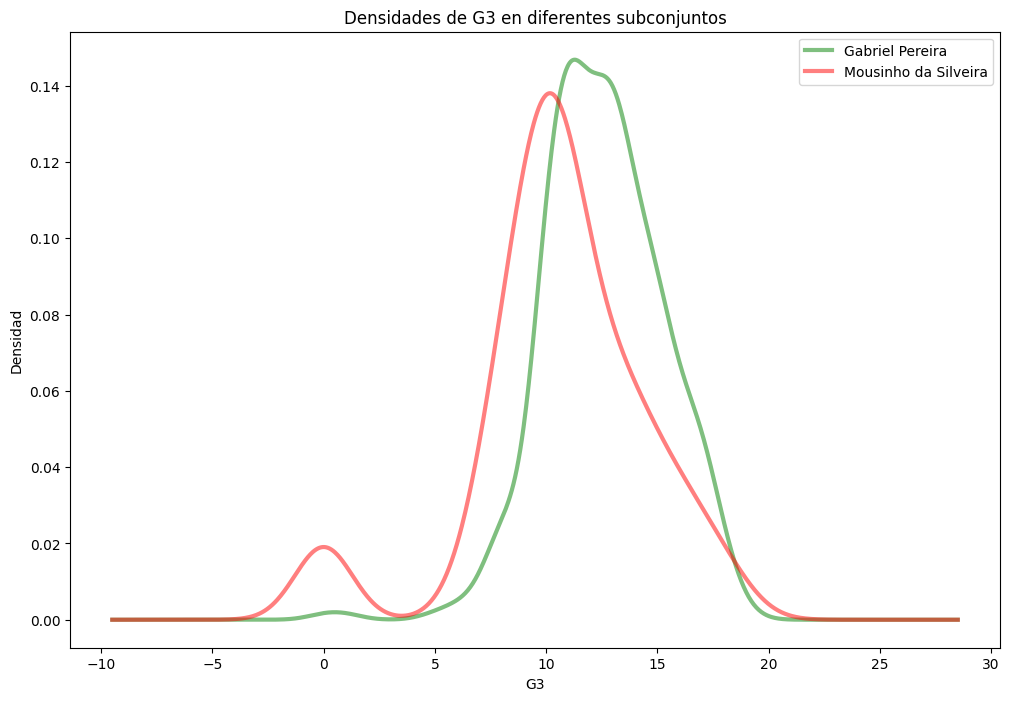

In [13]:
# Configuración del gráfico de densidades
plt.figure(figsize=(12, 8))

variable_x =  'G3'

for subset, label, color in zip([dfcGP, dfcMS], ['Gabriel Pereira', 'Mousinho da Silveira'], ['green', 'red']):
    subset[variable_x].plot(kind='density', alpha=0.5, label=label, color=color, linewidth=3)

# Configuración de leyendas y título
plt.title(f'Densidades de {variable_x} en diferentes subconjuntos')
plt.xlabel(variable_x)
plt.ylabel('Densidad')
plt.legend()
plt.show()


> La curva verde, que representa a Gabriel Pereira, muestra una distribución que tiende hacia calificaciones más altas, con un pico más a la derecha del gráfico. Esto es coherente con la media de calificaciones que observamos antes, la cual era superior para este colegio. La forma de la curva es bastante simétrica, indicando una distribución normal de las calificaciones en este colegio.

> La curva roja, correspondiente a Mousinho da Silveira, muestra su pico hacia la izquierda en comparación con la curva verde. Esto refleja la media más baja de calificaciones para este colegio. La curva también es simétrica y suavizada, lo que sugiere una distribución normal pero centrada en calificaciones más bajas.

>El área bajo cada curva representa la proporción de estudiantes en cada intervalo de notas. Donde las curvas se solapan, indica rangos de notas donde hay una presencia comparable de estudiantes de ambos colegios. Los lugares donde una curva está por encima de la otra señalan los rangos de notas en los que un colegio sobrepasa al otro en términos de número de estudiantes.

> **En resumen** , el gráfico de densidad visualiza la diferencia en el rendimiento académico entre los dos colegios, con Gabriel Pereira mostrando un rendimiento generalmente más alto que Mousinho da Silveira.

# GRÁFICO DE DENSIDADES POR SEXO

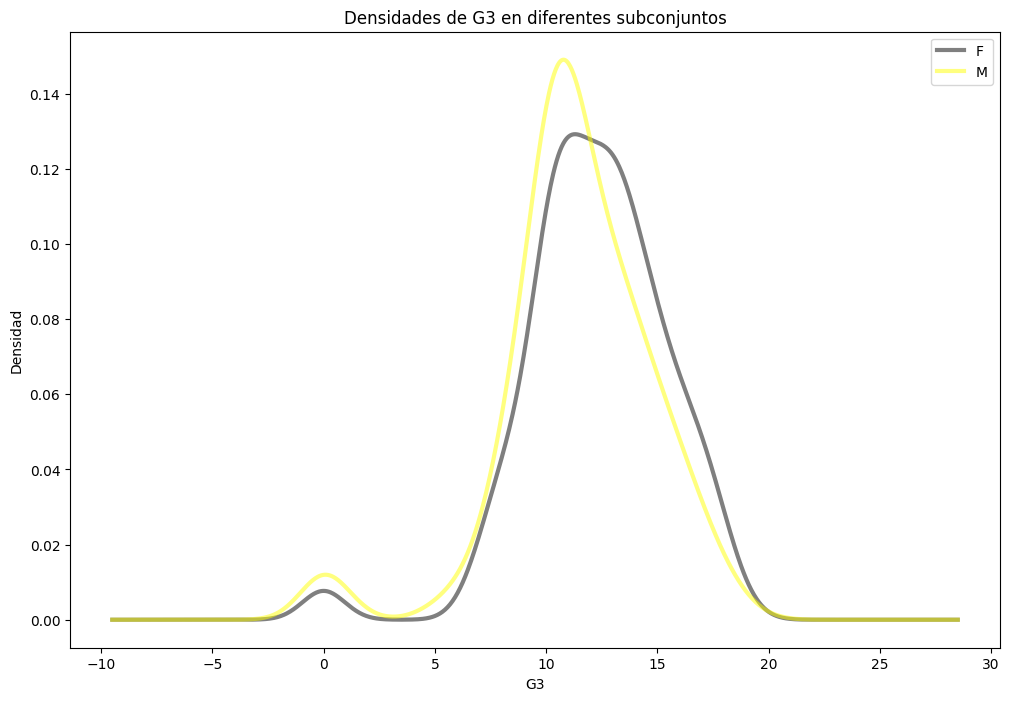

In [14]:
# Configuración del gráfico de densidades
plt.figure(figsize=(12, 8))

variable_x =  'G3'

for subset, label, color in zip([dfcF, dfcM], ['F', 'M'], ['black', 'yellow']):
    subset[variable_x].plot(kind='density', alpha=0.5, label=label, color=color, linewidth=3)

# Configuración de leyendas y título
plt.title(f'Densidades de {variable_x} en diferentes subconjuntos')
plt.xlabel(variable_x)
plt.ylabel('Densidad')
plt.legend()
plt.show()


> Ambas curvas parecen tener una distribución similar, con picos en torno al mismo rango de calificaciones. Esto indica que ambos géneros alcanzan las notas más frecuentes en un rango similar.

> La curva negra (mujeres) parece estar ligeramente más a la derecha que la curva amarilla (hombres), lo que implica que hay una proporción mayor de mujeres con calificaciones más altas. Esto es consistente con las estadísticas descriptivas previas, que indicaban que las mujeres tenían una media de calificaciones ligeramente más alta que los hombres.

> Las dos curvas son aproximadamente simétricas y siguen una forma similar, lo que sugiere que las notas están distribuidas de manera normal en ambos géneros.

> No hay diferencias drásticas entre las formas de las curvas, lo que indica que no hay una diferencia significativa en la variabilidad de las notas entre hombres y mujeres.

>**En resumen**, mientras que el rendimiento general de las mujeres puede ser ligeramente mejor que el de los hombres, ambos géneros presentan distribuciones de rendimiento académico bastante similares. Las diferencias en las notas finales por género no parecen ser grandes, aunque hay una leve tendencia hacia calificaciones más altas entre las mujeres.

# BOXPLOTS

C:\Users\Pacotm\AppData\Local\Temp\ipykernel_18312\208112996.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable_x, y=variable_y, data=dfc, palette=custom_palette)


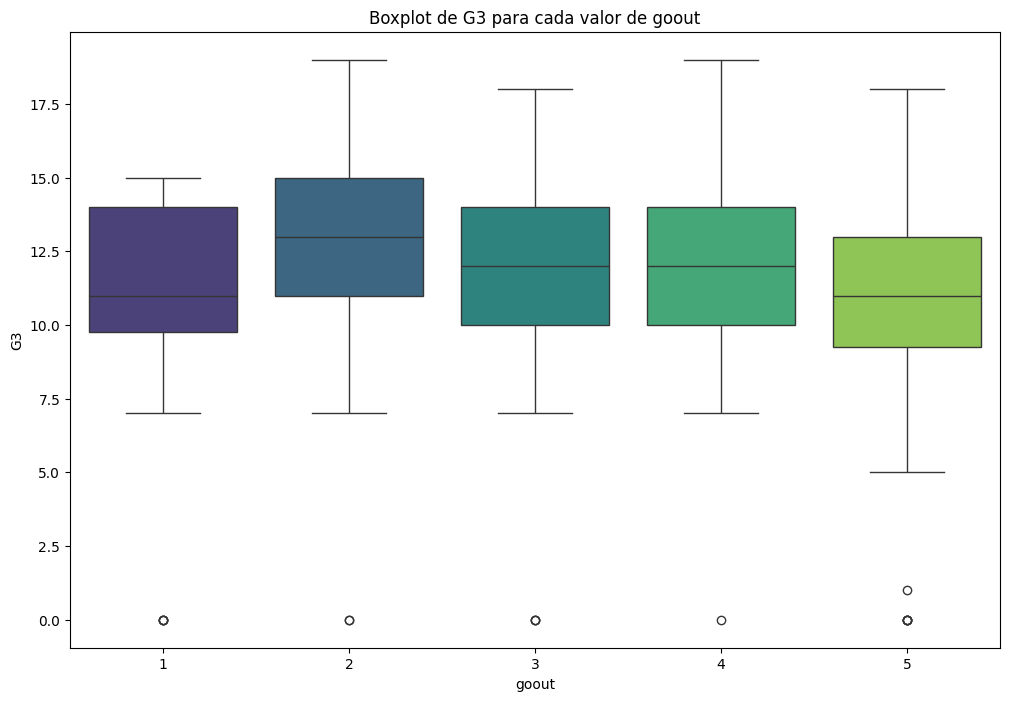

In [15]:
import seaborn as sns

# Definir una paleta de colores personalizada
custom_palette = sns.color_palette("viridis", len(dfc['goout'].unique()))
variable_x = 'goout'
variable_y = 'G3'
# Crear el boxplot con la paleta personalizada
plt.figure(figsize=(12, 8))
sns.boxplot(x=variable_x, y=variable_y, data=dfc, palette=custom_palette)
plt.title(f'Boxplot de {variable_y} para cada valor de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.show()


El boxplot proporciona una comparación visual entre los diferentes niveles de la variable goout (salir con amigos) y la variable G3 (nota final).

   - Cada "caja" representa el rango intercuartílico (IQR), del 25% al 75% percentil, de las calificaciones para un valor específico de goout. La línea dentro de la caja marca la mediana (el 50% percentil).
   - Los "bigotes" se extienden hasta el dato más lejano dentro de 1.5 veces el IQR desde los bordes de la caja. Los puntos fuera de los bigotes se consideran valores atípicos, que en este caso están presentes en todos los niveles de goout.
   - El color de cada caja representa un nivel diferente de salir con amigos, variando desde aquellos que salen menos (1) hasta los que salen más (5).

### A partir del gráfico, se pueden hacer algunas observaciones:

> No hay una tendencia clara o lineal que relacione el salir con amigos con las calificaciones. Es decir, no parece que aquellos que salen más tengan sistemáticamente mejores o peores calificaciones.

> La dispersión (el tamaño de las cajas) y la mediana de las notas parecen ser consistentes a través de los diferentes niveles de goout, aunque hay algunos valores atípicos en cada categoría, lo que indica que hay estudiantes con calificaciones muy bajas o muy altas que no siguen la tendencia general de su grupo.

> La categoría goout de 1 muestra valores atípicos en el extremo inferior de las calificaciones, y la categoría de 5 muestra valores atípicos tanto en el extremo inferior como en el superior, lo que podría sugerir una mayor variabilidad en las calificaciones de los estudiantes que salen con amigos muy poco o muy frecuentemente.



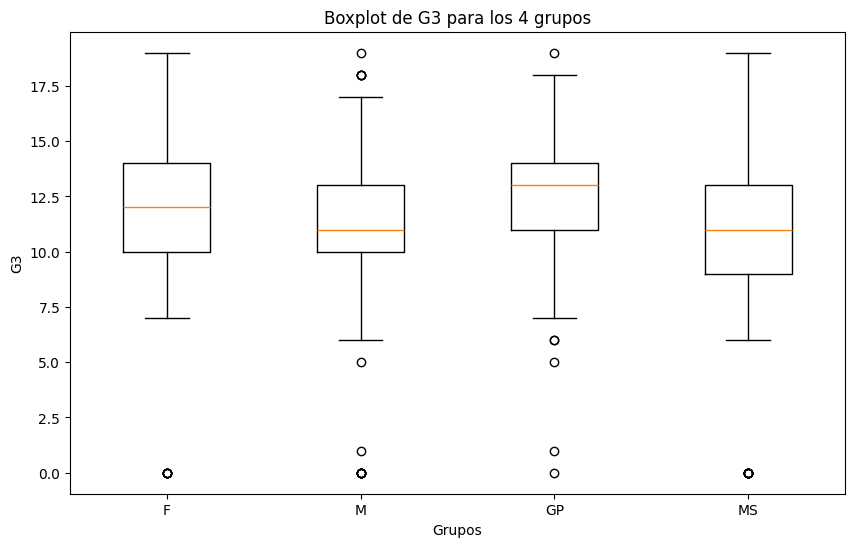

In [16]:
import matplotlib.pyplot as plt
import pandas as pd



dataframes = [dfcF, dfcM, dfcGP, dfcMS]
labels = ['F', 'M', 'GP', 'MS']


variable_y = 'G3'

# Crear el boxplot para cada DataFrame
plt.figure(figsize=(10, 6))
plt.boxplot([df[variable_y] for df in dataframes], labels=labels)
plt.title(f'Boxplot de {variable_y} para los 4 grupos')
plt.xlabel('Grupos')
plt.ylabel(variable_y)
plt.show()


El boxplot compara las notas finales (G3) para las cuatro submuestras basadas en el género y la escuela: mujeres (F), hombres (M), colegio Gabriel Pereira (GP) y colegio Mousinho da Silveira (MS).

   - Las líneas naranjas representan las medianas de las notas finales de cada grupo. Observamos que la mediana de las mujeres (F) y del colegio Gabriel Pereira (GP) es ligeramente superior a   la de los hombres (M) y del colegio Mousinho da Silveira (MS).
   - El tamaño de las cajas (que representan el rango intercuartílico entre el 25% y el 75%) sugiere que la variabilidad en las calificaciones es similar entre los géneros y las escuelas, aunque el colegio Mousinho da Silveira (MS) parece tener una variabilidad ligeramente mayor, como indica la caja más alta.
   - Los "bigotes" de los boxplots, que indican la variabilidad fuera de los cuartiles superior e inferior, son similares entre todos los grupos, aunque hay valores atípicos presentes en cada uno, indicados por los círculos. Los valores atípicos sugieren la presencia de estudiantes con notas significativamente más bajas o más altas que la mayoría de sus compañeros.
   - Las medianas en los boxplots de las mujeres y de los estudiantes del colegio Gabriel Pereira son más altas que las de los hombres y del colegio Mousinho da Silveira, respectivamente. Esto es consistente con un análisis anterior que sugirió que las mujeres y los estudiantes de GP podrían tener un rendimiento ligeramente mejor en términos de notas finales.

> No hay diferencias drásticas en la dispersión de las notas (como se ve en la altura de las cajas) entre los grupos, lo que indica que la gama de notas es similar en términos de la extensión entre el estudiante medio y los que se encuentran cerca de los cuartiles inferior y superior.



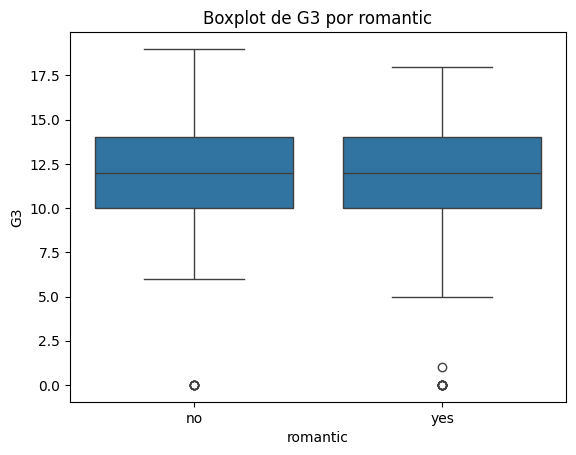

In [17]:
sns.boxplot(x='romantic', y='G3', data=df)
plt.title('Boxplot de G3 por romantic')
plt.show()

> El boxplot muestra la distribución de las calificaciones finales (G3) de los estudiantes, segmentada según su estado romántico (si están o no en una relación romántica). Observando el gráfico:

- La mediana de las calificaciones para ambos grupos, "no" y "yes", parece ser muy similar, lo que sugiere que estar en una relación romántica no tiene un impacto significativo en la mediana de las calificaciones finales.
- La variabilidad de las calificaciones, indicada por el tamaño de las cajas (el rango intercuartílico), también es similar entre ambos grupos. Esto sugiere que la variabilidad en las calificaciones finales no cambia mucho según el estado romántico de los estudiantes.
- Ambos grupos tienen valores atípicos, indicados por los círculos fuera de los bigotes de los boxplots, lo que sugiere que hay estudiantes con calificaciones muy altas o muy bajas en ambos grupos.
- Los "bigotes" de los boxplots (que representan la distancia desde el cuartil hasta el valor mínimo o máximo sin contar los atípicos) parecen ligeramente más largos para los estudiantes en una relación romántica, indicando que hay una variabilidad ligeramente mayor en las notas de este grupo.
> Dado que las medianas son similares, posteriormente realizaremos análisis más detallado donde incluiremos una prueba estadística t para muestras independientes, para determinar si las diferencias en las medias de las calificaciones son estadísticamente significativas

# 4. ANÁLISIS INFERENCIAL

# Medias de las calificaciones finales G3 por intervalo de confianza

In [18]:
# Calcular la media para cada valor de 'goout'
mean_by_goout = dfc.groupby('goout')['G3'].mean()
ci_by_goout = dfc.groupby('goout')['G3'].apply(lambda x: sm.stats.DescrStatsW(x).tconfint_mean())
summary_df = pd.DataFrame({'Media de G3': mean_by_goout, 'Intervalo de Confianza': ci_by_goout})
print(summary_df)


       Media de G3                    Intervalo de Confianza
goout                                                       
1        10.729167    (9.612189034579592, 11.84614429875374)
2        12.668966  (12.148431767112772, 13.189499267369985)
3        12.151220  (11.751558997207656, 12.550880027182586)
4        11.971631  (11.502412703053533, 12.440849708293985)
5        10.872727  (10.169786036391951, 11.575668509062595)


>La tabla resume las medias de las calificaciones finales (G3) para los estudiantes, agrupadas por el nivel de frecuencia con la que salen con amigos (goout), y proporciona un intervalo de confianza para cada media. Los intervalos de confianza son del 95%, lo que significa que estamos 95% seguros de que el intervalo contiene la verdadera media de la población para ese grupo particular.

> **Aquí está el análisis de la tabla:**

- Los estudiantes que salen con amigos muy poco (goout=1) tienen una media de calificaciones de 10.73 con un intervalo de confianza que va de 9.61 a 11.85. Este intervalo es relativamente amplio, lo que sugiere una mayor incertidumbre sobre la verdadera media de la población de este grupo.
- Para los estudiantes que salen con amigos poco frecuentemente (goout=2), la media de calificaciones es 12.67 con un intervalo de confianza más estrecho de 12.15 a 13.19, lo que indica una estimación más precisa de la media para este grupo.
- Aquellos con una frecuencia moderada de salidas (goout=3) tienen una media de 12.15 y un intervalo de confianza que va de 11.75 a 12.55, también sugiriendo una buena precisión de la media estimada.
- Los estudiantes que salen con amigos frecuentemente (goout=4) tienen una media de calificaciones de 11.97, y el intervalo de confianza se extiende de 11.50 a 12.44, lo cual es similar en términos de precisión a los del grupo de goout=3.
- Finalmente, para los estudiantes que salen con amigos muy frecuentemente (goout=5), la media de calificaciones baja a 10.87 con un intervalo de confianza que va de 10.17 a 11.58, indicando una vez más una mayor incertidumbre en la media de la población para este grupo.

>Lo interesante de estos resultados es que los estudiantes con niveles de goout de 2 y 3 tienen las calificaciones medias más altas, mientras que aquellos en los extremos de la escala, quienes salen muy poco o mucho (goout=1 y 5), tienen medias más bajas. Esto podría sugerir que una moderación en la actividad social está asociada con un mejor rendimiento académico.

In [19]:
# Calcular el conteo de registros para cada valor único de 'goout'
conteo_goout = dfc['goout'].value_counts()

# Mostrar el conteo de registros para cada valor único de 'goout'
print(conteo_goout)


3    205
2    145
4    141
5    110
1     48
Name: goout, dtype: int64


HEMOS calculado el número de estudiantes que caen en cada categoría de la variable goout, que representa la frecuencia con la que los estudiantes salen con amigos. Aquí está la interpretación:

- 205 estudiantes salen con amigos con una frecuencia moderada (goout=3), lo que los hace el grupo más grande en esta variable específica.
- 145 estudiantes tienen una baja frecuencia de salidas (goout=2).
- 141 estudiantes salen con amigos frecuentemente (goout=4).
- 110 estudiantes salen con amigos muy frecuentemente (goout=5).
- Solo 48 estudiantes están en el grupo que sale con amigos muy poco (goout=1), lo que lo hace el grupo más pequeño.
- 
>Estos datos muestran que la mayoría de los estudiantes tienen una tendencia a salir con amigos de manera moderada a frecuente, con menos estudiantes en los extremos de salir muy poco o muy frecuentemente. Esta información, combinada con las medias de las calificaciones y los intervalos de confianza que calcuLAMOS previamente, puede ofrecer una vista más completa de cómo las actividades sociales de los estudiantes están relacionadas con su rendimiento académico.

In [20]:
from scipy.stats import ttest_ind

# Obtener las notas cuando goout es 2 y cuando goout es 5
notas_goout_2 = dfc[dfc['goout'] == 2]['G3']
notas_goout_5 = dfc[dfc['goout'] == 5]['G3']

# Realizar el test de hipótesis
t_statistic, p_value = ttest_ind(notas_goout_2, notas_goout_5)

# Imprimir los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)


Estadístico t: 4.155833178091734
Valor p: 4.438110257977916e-05


> Dado que el valor p es mucho menor que el umbral común de **0.05**, **rechazamos la hipótesis nula**. Esto significa que hay una diferencia estadísticamente significativa en las medias de las calificaciones finales entre los estudiantes que salen con amigos poco frecuentemente (goout=2) y los que salen muy frecuentemente (goout=5). Los estudiantes que salen con amigos menos frecuentemente tienen, en promedio, calificaciones finales significativamente más altas que aquellos que salen muy frecuentemente, con una confianza estadística alta.

Este hallazgo podría sugerir que la frecuencia con la que los estudiantes salen con amigos puede tener un impacto en su rendimiento académico.

In [21]:
from scipy.stats import ttest_ind

# Obtener las notas cuando goout es 1 y cuando goout es 5
notas_goout_2 = dfc[dfc['goout'] == 1]['G3']
notas_goout_5 = dfc[dfc['goout'] == 5]['G3']

# Realizar el test de hipótesis
t_statistic, p_value = ttest_ind(notas_goout_2, notas_goout_5)

# Imprimir los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)


Estadístico t: -0.2208055704481046
Valor p: 0.8255325541986781


El valor p es 0.8255; Por lo tanto, no hay suficiente evidencia para rechazar la hipótesis nula, lo que significa que **no hay una diferencia significativa en las notas entre los grupos donde goout es 1 y donde goout es 5.**

>Esto sugiere que la frecuencia de salir con amigos, al menos en los extremos de la escala, no tiene un impacto estadísticamente significativo en las calificaciones finales de los estudiantes según estos datos.

## Estudio normalidad G3

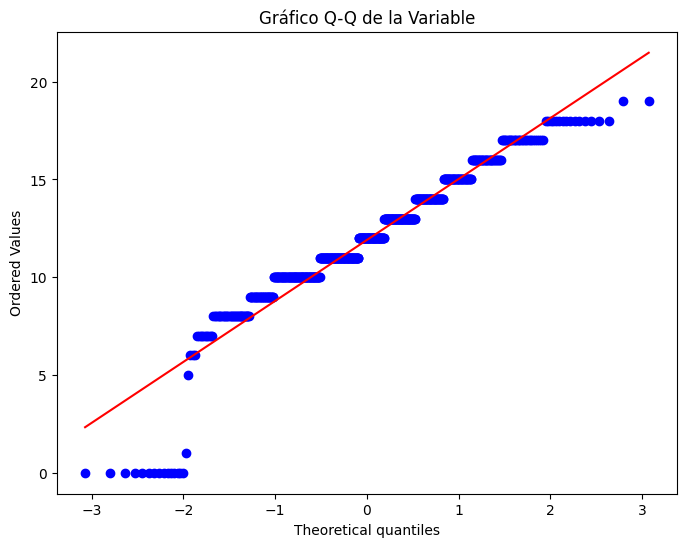

In [22]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu variable de interés
data = dfc['G3']

# Configuración del gráfico Q-Q
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de la Variable')
plt.show()

El gráfico Q-Q (cuantil-cuantil)  creado se utiliza para evaluar si la distribución de una variable sigue una distribución normal. Compara los cuantiles de tus datos con los cuantiles esperados de una distribución normal. 

## En el gráfico:

- Los puntos azules representan los cuantiles observados de la variable G3.
- La línea roja representa la expectativa para una distribución normal.
- Si la variable G3 siguiera perfectamente una distribución normal, esperaríamos que los puntos azules se alinearan exactamente sobre la línea roja.

## Analizando el gráfico:

- La mayor parte de los puntos parecen seguir la línea roja, lo que sugiere que las calificaciones finales (G3) se distribuyen **aproximadamente de manera normal.**

- Sin embargo, hay algunas desviaciones, especialmente en los extremos inferiores de la distribución (a la izquierda), donde los puntos se alejan de la línea. Esto indica que hay más calificaciones bajas en tus datos de las que esperaríamos en una distribución normal. Además, hay una ligera desviación en los extremos superiores (a la derecha), lo que podría sugerir que hay más calificaciones altas de lo esperado.

- Las desviaciones de la línea en los extremos pueden ser un indicio de colas pesadas o ligeros sesgos en la distribución de las calificaciones.


In [23]:
from scipy.stats import shapiro

data = dfc['G3']

# Realizar la prueba de Shapiro-Wilk
stat, p_value = shapiro(data)

print(f'Estadístico de prueba: {stat}')
print(f'Valor p: {p_value}')

Estadístico de prueba: 0.9259809367060796
Valor p: 2.4159862607742608e-17


>**Estadístico de prueba**: El valor de aproximadamente 0.926 indica que la distribución no se ajusta perfectamente a una distribución normal, pero un valor cercano a 1 sugiere que no está muy lejos.

>Valor p: Un valor p extremadamente pequeño, como el que has obtenido (aproximadamente 2.42e-17), es significativamente menor que cualquier umbral convencional para el valor p (como 0.01 o 0.05), lo que indica que la prueba ha detectado una desviación de la normalidad en los datos de las calificaciones finales (G3).

>En base a la prueba de Shapiro-Wilk, debemos rechazar la hipótesis nula de que G3 sigue una distribución normal. Esto sugiere que, aunque el gráfico Q-Q mostraba que los datos se alineaban aproximadamente con la distribución normal, la prueba de Shapiro-Wilk ha detectado desviaciones significativas que podrían ser importantes, dependiendo de cómo pienses utilizar estos datos.

In [24]:
from scipy.stats import anderson


data = dfc['G3']

# Realizar la prueba de Anderson-Darling
result = anderson(data)

print(f'Estadístico de prueba: {result.statistic}')
print(f'Valores críticos: {result.critical_values}')
print(f'Niveles de significancia: {result.significance_level}')

Estadístico de prueba: 8.233576677118435
Valores críticos: [0.573 0.652 0.782 0.912 1.085]
Niveles de significancia: [15.  10.   5.   2.5  1. ]


>La prueba de Anderson-Darling es otra prueba de normalidad, similar a la de Shapiro-Wilk, pero que pone más énfasis en las colas de la distribución de los datos. 

>**Estadístico de prueba:** El valor de aproximadamente 8.23 es el cálculo de la prueba de Anderson-Darling. Este valor se comparará con los valores críticos dados para determinar si la distribución se desvía de la normalidad.

>**Valores críticos:** Son los valores umbral que el estadístico de prueba debe superar para que puedas rechazar la hipótesis nula de normalidad a diferentes niveles de significancia. Los niveles comunes son 15%, 10%, 5%, 2.5% y 1%.

>**Niveles de significancia:** Estos son los niveles de significancia correspondientes a los valores críticos. Por ejemplo, un valor crítico de 0.652 corresponde a un nivel de significancia del 10%.

Para interpretar la prueba de Anderson-Darling, comparamos el estadístico de prueba con los valores críticos. Si el estadístico de prueba es mayor que un valor crítico dado, puedes rechazar la hipótesis nula de normalidad a ese nivel de significancia.

En nuestro caso, el estadístico de prueba de 8.23 excede todos los valores críticos listados, lo que indica que puedes rechazar la hipótesis nula de normalidad en todos los niveles de significancia. Esto significa que hay evidencia estadísticamente significativa de que la variable G3 no se distribuye normalmente.

Este resultado es coherente con la prueba de Shapiro-Wilk que realizamos previamente, reforzando la idea de que la distribución de las calificaciones finales (G3) se desvía de la distribución normal. Como se mencionó antes.

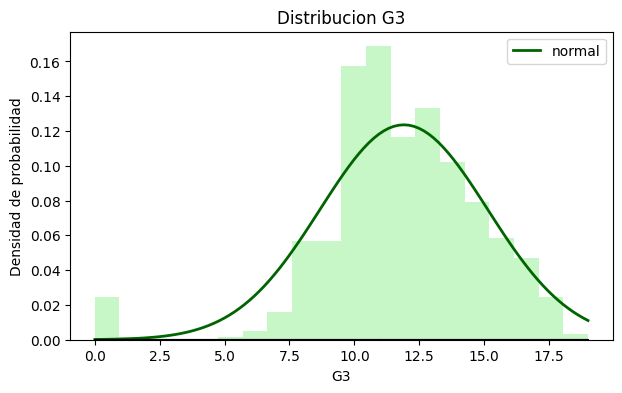

In [25]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = stats.norm.fit(dfc['G3'])  # Change 'goout' to 'G3'

x_hat = np.linspace(min(dfc['G3']), max(dfc['G3']), num=100)  # Change 'goout' to 'G3'
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x_hat, y_hat, linewidth=2, color="darkgreen", label='normal')
ax.hist(dfc['G3'], density=True, bins=20, color="lightgreen", alpha=0.5)  # Change 'goout' to 'G3'
ax.plot(dfc['G3'], np.full_like(dfc['G3'], -0.01), 'k', markeredgewidth=1)  # Change 'goout' to 'G3'
ax.set_title('Distribucion G3')  # Change 'goout' to 'G3'
ax.set_xlabel('G3')  # Change 'goout' to 'G3'
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

plt.show()



> El histograma muestra la distribución de las calificaciones finales G3 de los estudiantes. La superposición de una curva de distribución normal indica cómo se comparan los datos reales con una distribución idealmente normal.

# Observando el gráfico:

- El pico del histograma indica la moda de los datos, y la curva de la distribución normal ajustada sugiere dónde se esperarían que estuvieran los datos si siguieran una distribución perfectamente normal basada en la media y desviación estándar de los datos de G3.
- Se puede notar que hay una acumulación significativa de datos en el extremo superior de las calificaciones, lo que podría corresponder a un límite superior en las calificaciones que se pueden obtener (como un 20 en un sistema de calificación 0-20). Esto no se ajusta al comportamiento de una distribución normal y podría ser la causa de la desviación de la normalidad que se observó en las pruebas estadísticas anteriores.
- La curva normal parece ajustarse razonablemente bien en el centro de la distribución, pero difiere en los extremos, especialmente en el extremo inferior, donde los datos muestran más dispersión de lo que la curva normal predice. Esto es consistente con la presencia de sesgo o de colas pesadas que las pruebas de normalidad han identificado.
Este tipo de visualización es útil para identificar la forma de la distribución de los datos y cómo se alinea con la distribución normal teórica. Los hallazgos visuales del histograma concuerdan con los resultados de las pruebas de normalidad, confirmando que los datos no siguen una distribución normal perfecta, lo que podría ser importante considerar en el análisis subsiguiente y la interpretación de los resultados.

# HOMOCEDASTICIDAD

In [26]:
from scipy.stats import levene

# Prueba de Levene para la variable 'school'
school_groups = [dfc[dfc['school'] == level]['G3'] for level in dfc['school'].unique()]
stat_school, p_val_school = levene(*school_groups)
print(f'Levene test for school: Statistic = {stat_school}, p-value = {p_val_school}')

# Prueba de Levene para la variable 'goout'
goout_groups = [dfc[dfc['goout'] == level]['G3'] for level in dfc['goout'].unique()]
stat_goout, p_val_goout = levene(*goout_groups)
print(f'Levene test for goout: Statistic = {stat_goout}, p-value = {p_val_goout}')

# Prueba de Levene para la variable 'sex'
sex_groups = [dfc[dfc['sex'] == gender]['G3'] for gender in dfc['sex'].unique()]
stat_sex, p_val_sex = levene(*sex_groups)
print(f'Levene test for sex: Statistic = {stat_sex}, p-value = {p_val_sex}')


Levene test for school: Statistic = 12.706279036730162, p-value = 0.00039127265180719
Levene test for goout: Statistic = 1.3407229629660002, p-value = 0.25332788649427623
Levene test for sex: Statistic = 0.007145147339813032, p-value = 0.9326620157836524


>- Escuela (school):
    Estadístico: 12.7063
    Valor p: 0.00039
    Este resultado indica una diferencia significativa en las varianzas de las calificaciones G3 entre las diferentes escuelas. Hay suficiente evidencia para rechazar la hipótesis nula de homocedasticidad para la variable school.

>- Salir con amigos (goout):
    Estadístico: 1.3407
    Valor p: 0.2533
    No hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad para la variable goout, lo que indica que las varianzas de las calificaciones G3 son similares a través de los diferentes niveles de salir con amigos.

>- Sexo (sex):
    Estadístico: 0.0071
    Valor p: 0.9327
    Similarmente, no hay evidencia para rechazar la hipótesis nula de homocedasticidad para la variable sex, lo que sugiere que las varianzas de las calificaciones G3 son homogéneas entre los diferentes géneros.
    
Implicaciones para tu Análisis:
Para school: Dado que la homocedasticidad no se mantiene,deberíamos considerar métodos estadísticos que sean robustos a la heterocedasticidad, como el ANOVA de Welch, o bien realizar análisis separados por escuela.

Para goout y sex: Podemos proceder con análisis que asuman homocedasticidad, como el ANOVA tradicional, ya que no se detectaron diferencias significativas en las varianzas asociadas con estas variables.

# T-TEST

In [27]:

group1 = dfc[dfc['romantic'] == 'no']['G3']
group2 = dfc[dfc['romantic'] == 'yes']['G3']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')



T-Statistic: 2.3135952370325024
P-Value: 0.021002471524651137


>Los resultados de la prueba t para comparar las calificaciones finales (G3) entre estudiantes que no están en una relación romántica (no) y aquellos que están en una (yes) muestran:

- T-Statistic: 2.3136. Este valor indica la diferencia entre las medias de los dos grupos en términos de desviación estándar. Un valor positivo sugiere que la media del primer grupo (estudiantes que no están en una relación romántica) es mayor que la del segundo grupo (estudiantes que están en una relación).

- P-Value: 0.0210. Este valor te dice la probabilidad de observar una diferencia tan grande o mayor en las medias de las calificaciones finales entre los dos grupos, bajo la hipótesis nula de que no hay diferencia real entre las medias de los grupos en la población.

>Dado que el valor p es menor que el nivel de significancia comúnmente aceptado de 0.05, puedes rechazar la hipótesis nula y concluir que hay una diferencia estadísticamente significativa en las calificaciones finales entre estudiantes que están y no están en una relación romántica. La dirección de la diferencia, indicada por el estadístico t positivo, sugiere que los estudiantes que no están en una relación romántica tienden a tener calificaciones finales más altas que aquellos que sí están en una.

>Este resultado podría sugerir que estar en una relación romántica tiene un impacto en el rendimiento académico, aunque es crucial recordar que la correlación no implica causalidad.

# ANOVA


In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Suponiendo que las escuelas en tus datos se identifican como 'GP' y 'MS'
schools = dfc['school'].unique()

# Diccionario para almacenar las tablas ANOVA para cada escuela
anova_tables = {}

for school in schools:
    # Filtrar el DataFrame para incluir solo datos de la escuela actual
    df_school = dfc[dfc['school'] == school]
    
    # Ajustar el modelo ANOVA solo con los datos de esta escuela
    model_school = ols('G3 ~ C(goout) + C(sex)', data=df_school).fit()
    
    # Obtener y almacenar la tabla ANOVA para la escuela actual
    anova_tables[school] = sm.stats.anova_lm(model_school, typ=2)

# Imprimir las tablas ANOVA para cada escuela
for school in schools:
    print(f"Tabla ANOVA para la escuela {school}:\n{anova_tables[school]}\n")


Tabla ANOVA para la escuela GP:
               sum_sq     df          F    PR(>F)
C(goout)   128.397985    4.0   4.990109  0.000614
C(sex)      91.064702    1.0  14.156696  0.000192
Residual  2682.404247  417.0        NaN       NaN

Tabla ANOVA para la escuela MS:
               sum_sq     df         F    PR(>F)
C(goout)   110.413767    4.0  1.936333  0.105419
C(sex)      54.495873    1.0  3.822790  0.051826
Residual  3136.215001  220.0       NaN       NaN



>Las tablas ANOVA separadas para las escuelas Gabriel Pereira (GP) y Mousinho da Silveira (MS) proporcionan información interesante sobre cómo las variables goout y sex influyen en las calificaciones G3 dentro de cada escuela:

## Escuela Gabriel Pereira (GP):

**Salir con amigos (goout):**
F-Statistic: 4.990109, significativo con un valor p de 0.000614.
Esto sugiere que dentro de la escuela GP, la variable goout tiene un impacto significativo en las calificaciones G3.

**Sexo (sex):**
F-Statistic: 14.156696, significativo con un valor p de 0.000192.
El género también tiene un impacto significativo en las calificaciones G3 en la escuela GP.

## Escuela Mousinho da Silveira (MS):

**Salir con amigos (goout):**
F-Statistic: 1.936333, no significativo con un valor p de 0.105419.
Esto indica que dentro de la escuela MS, no hay suficiente evidencia para afirmar que goout afecta significativamente las calificaciones G3.

**Sexo (sex):**
F-Statistic: 3.822790, marginalmente no significativo con un valor p de 0.051826.
El género tiene un impacto que es marginalmente no significativo en las calificaciones G3 en la escuela MS; el valor p está justo en el umbral de significancia común de 0.05.

## Interpretación:

- Las influencias de goout y sex en las calificaciones finales parecen variar entre las dos escuelas. En la escuela GP, ambos factores son significativos, mientras que en la escuela MS, no parecen tener un impacto significativo, aunque el género está cerca del umbral de significancia.
- La variación en los efectos entre las dos escuelas podría deberse a diferencias culturales, pedagógicas, o demográficas entre las poblaciones estudiantiles de las dos escuelas.


# POST-HOC

In [29]:
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Realizar el test de Tukey
tukey_results = pairwise_tukeyhsd(endog=dfc['G3'], groups=dfc['goout'], alpha=0.05)

# Imprimir los resultados del test de Tukey
print(tukey_results)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   1.9398 0.0024  0.4946   3.385   True
     1      3   1.4221 0.0424  0.0305  2.8137   True
     1      4   1.2425 0.1326 -0.2078  2.6927  False
     1      5   0.1436  0.999 -1.3577  1.6448  False
     2      3  -0.5177 0.5603 -1.4595   0.424  False
     2      4  -0.6973 0.3411 -1.7238  0.3291  False
     2      5  -1.7962 0.0001 -2.8936 -0.6989   True
     3      4  -0.1796 0.9856 -1.1291  0.7699  False
     3      5  -1.2785 0.0062 -2.3042 -0.2528   True
     4      5  -1.0989 0.0518 -2.2029  0.0051  False
----------------------------------------------------


Los resultados de Tukey muestran comparaciones entre diferentes niveles de la variable goout en relación con la calificación final G3. Los resultados incluyen las diferencias de medias estimadas (meandiff), el valor ajustado de p (p-adj), los intervalos de confianza inferior y superior (lower y upper), y si debemos rechazar la hipótesis nula de igualdad de medias para cada comparación pareada (reject).

>**Interpretación de algunos resultados claves:**
- Hay diferencias significativas en las calificaciones G3 entre los estudiantes que no salen mucho (nivel 1 de goout) y los que salen más frecuentemente (niveles 2 y 3).
- No hay diferencias significativas en las calificaciones G3 entre los estudiantes que salen con frecuencia (nivel 4 de goout) y los que salen mucho (nivel 5).
- Hay una diferencia significativa entre los estudiantes que salen ocasionalmente (nivel 2) y los que salen mucho (nivel 5).

In [30]:
# Realizar el test de Tukey
tukey_results = pairwise_tukeyhsd(endog=dfc['G3'], groups=dfc['sex'], alpha=0.05)

# Imprimir los resultados del test de Tukey
print(tukey_results)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     F      M  -0.8472 0.001 -1.3497 -0.3448   True
---------------------------------------------------


El test de Tukey  que hemos realizado para comparar las diferencias en las calificaciones finales G3 entre grupos de sexo (F para femenino y M para masculino) muestra los siguientes resultados:
- Diferencia de medias (meandiff): -0.8472. Esto indica que las calificaciones medias de los estudiantes masculinos (M) son 0.8472 puntos más bajas que las de las estudiantes femeninas (F), en promedio.
- Valor p ajustado (p-adj): 0.001. Este valor es menor que el nivel de significancia de 0.05, lo que indica que la diferencia en las calificaciones medias entre géneros es estadísticamente significativa.
- Intervalos de confianza: El intervalo de confianza para la diferencia de medias va de -1.3497 a -0.3448, lo que no incluye el 0, reforzando la conclusión de que hay una diferencia significativa.
- Rechazo de la hipótesis nula (reject): True. Esto significa que hay suficiente evidencia para rechazar la hipótesis nula de que no hay diferencia en las calificaciones medias entre los estudiantes femeninos y masculinos.
Interpretación

> Los resultados sugieren que existe una diferencia estadísticamente significativa en las calificaciones finales G3 entre estudiantes femeninas y masculinos, con las estudiantes femeninas obteniendo, en promedio, calificaciones más altas que los estudiantes masculinos. 

In [31]:
# Realizar el test de Tukey
tukey_results = pairwise_tukeyhsd(endog=dfc['G3'], groups=dfc['school'], alpha=0.05)

# Imprimir los resultados del test de Tukey
print(tukey_results)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    GP     MS  -1.9264   0.0 -2.4279 -1.4249   True
---------------------------------------------------


El test de Tukey para comparar las diferencias en las calificaciones finales G3 entre las dos escuelas (GP y MS) muestra lo siguiente:

- Diferencia de medias (meandiff): -1.9264. Esto indica que, en promedio, las calificaciones G3 de los estudiantes de la escuela MS son 1.9264 puntos más bajas que las de los estudiantes de la escuela GP.
- Valor p ajustado (p-adj): 0.0. Este valor es significativamente menor que el umbral común de 0.05, indicando que la diferencia en las calificaciones medias entre las dos escuelas es estadísticamente significativa.
- Intervalos de confianza: El intervalo de confianza para la diferencia de medias va de -2.4279 a -1.4249, lo que no incluye el 0, confirmando la existencia de una diferencia significativa.
- Rechazo de la hipótesis nula (reject): True. Esto significa que hay suficiente evidencia estadística para rechazar la hipótesis nula de que no hay diferencia en las calificaciones medias entre las dos escuelas.
  
> Los resultados del test de Tukey indican una diferencia estadísticamente significativa en las calificaciones G3 entre las escuelas GP y MS, con las calificaciones en GP siendo más altas en promedio.

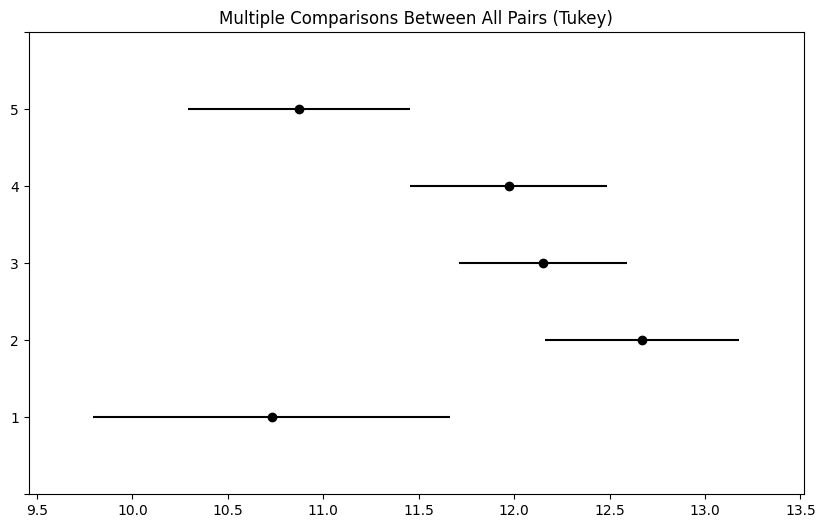

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.9398,0.0024,0.4946,3.385,True
1,3,1.4221,0.0424,0.0305,2.8137,True
1,4,1.2425,0.1326,-0.2078,2.6927,False
1,5,0.1436,0.999,-1.3577,1.6448,False
2,3,-0.5177,0.5603,-1.4595,0.424,False
2,4,-0.6973,0.3411,-1.7238,0.3291,False
2,5,-1.7962,0.0001,-2.8936,-0.6989,True
3,4,-0.1796,0.9856,-1.1291,0.7699,False
3,5,-1.2785,0.0062,-2.3042,-0.2528,True
4,5,-1.0989,0.0518,-2.2029,0.0051,False


In [32]:
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=dfc['G3'], groups=dfc['goout'], alpha=0.05)

# Gráfico de intervalos de confianza y líneas rojas
tukey.plot_simultaneous()
plt.vlines(x=tukey.meandiffs, ymin=-0.5, ymax=len(tukey.groupsunique)-1.5, color="red")

plt.show()

# Resumen de los resultados
tukey.summary()



Este gráfico representa un gráfico de intervalos de confianza del test de Tukey, que es una forma visual de mostrar las diferencias entre las medias de grupos y si estas diferencias son estadísticamente significativas.

La tabla muestra los resultados del análisis de comparaciones múltiples entre todos los pares de niveles de la variable goout, indicando las diferencias de medias ajustadas, los valores p ajustados y si estas diferencias son estadísticamente significativas. Los intervalos horizontales representan los intervalos de confianza de 95% para las diferencias de medias entre grupos.


Cuando el intervalo de confianza no cruza la línea vertical que representaría una diferencia de medias de 0, podemos rechazar la hipótesis nula de que las medias de los dos grupos son iguales 

Si el intervalo de confianza cruza la línea vertical de diferencia de medias de 0, no hay suficiente evidencia para rechazar la hipótesis nula de que las medias son iguales (indicado por False).
En la tabla, por ejemplo, hay diferencias significativas entre los niveles 1 y 2, 1 y 3, y entre los niveles 2 y 5, entre otros. Esto se confirmaría visualmente en el gráfico por la no superposición de los intervalos de confianza correspondientes a estos pares de niveles.

Dado que hemos identificado homocedasticidad para las variables goout y sex, esto sugiere que las varianzas entre los diferentes niveles de goout y entre los géneros son similares, y por lo tanto, el uso de ANOVA y el test post-hoc de Tukey  son apropiado y los resultados son fiables en términos de controlar el error de tipo I a nivel de la familia.

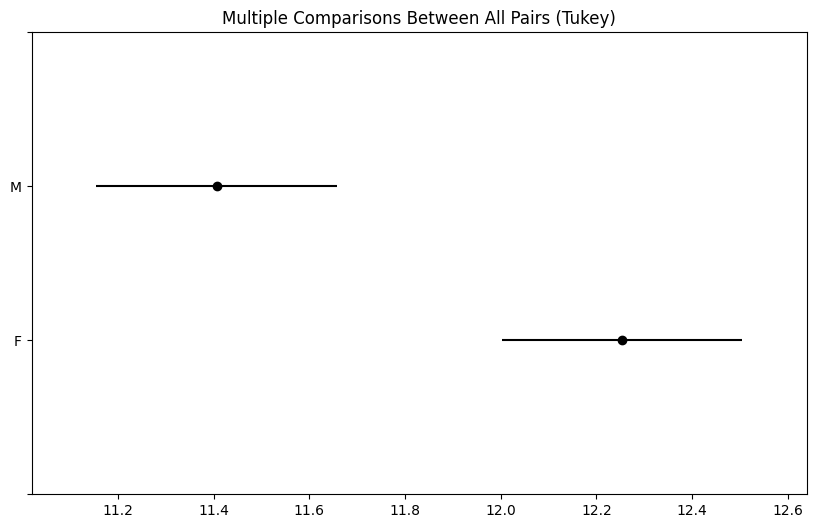

group1,group2,meandiff,p-adj,lower,upper,reject
F,M,-0.8472,0.001,-1.3497,-0.3448,True


In [33]:
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=dfc['G3'], groups=dfc['sex'], alpha=0.05)

# Gráfico de intervalos de confianza y líneas rojas
tukey.plot_simultaneous()
plt.vlines(x=tukey.meandiffs, ymin=-0.5, ymax=len(tukey.groupsunique)-1.5, color="red")

plt.show()

# Resumen de los resultados
tukey.summary()


El gráfico muestra un análisis de comparación de medias múltiples utilizando el test de Tukey para la variable sex. Se puede observar que las diferencias de medias entre los grupos femenino (F) y masculino (M) son estadísticamente significativas, como indica la tabla incluida.

La línea horizontal para cada grupo representa el intervalo de confianza del 95% alrededor de la media estimada del grupo, y el punto en el medio de cada línea indica la media estimada. La ausencia de solapamiento entre los dos intervalos de confianza sugiere que la diferencia en las calificaciones promedio es significativa

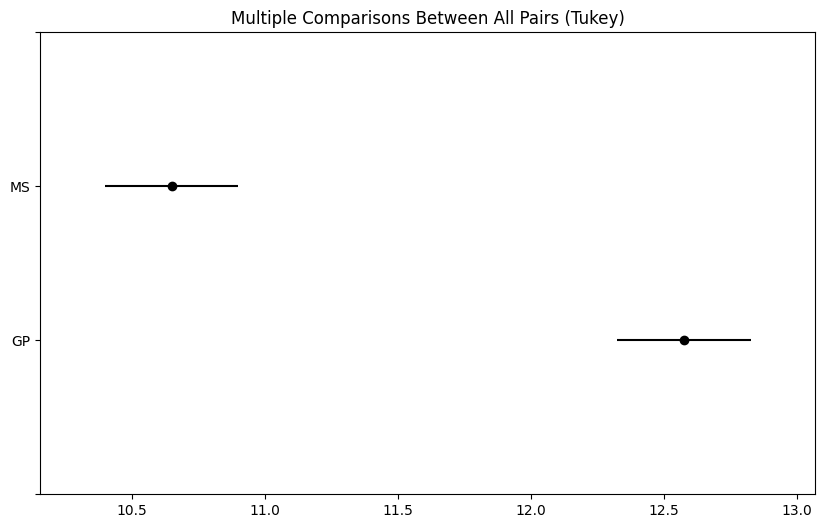

group1,group2,meandiff,p-adj,lower,upper,reject
GP,MS,-1.9264,0.0,-2.4279,-1.4249,True


In [34]:
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=dfc['G3'], groups=dfc['school'], alpha=0.05)

# Gráfico de intervalos de confianza y líneas rojas
tukey.plot_simultaneous()
plt.vlines(x=tukey.meandiffs, ymin=-0.5, ymax=len(tukey.groupsunique)-1.5, color="red")

plt.show()

# Resumen de los resultados
tukey.summary()


El gráfico muestra un análisis de comparación de medias múltiples utilizando el test de Tukey para la variable de las calificaciones G3 entre las dos escuelas, GP y MS. Cada línea horizontal representa el intervalo de confianza para la diferencia de medias entre las dos escuelas, y el punto denota la diferencia de medias estimada. Como no hay superposición entre los intervalos de confianza, esto indica que hay una diferencia estadísticamente significativa en las calificaciones entre las dos escuelas, lo cual se confirma con un valor p ajustado de 0.0 y la indicación True para rechazar la hipótesis nula de igualdad de medias.

# Resultados y Conclusiones

## Resultados

Resultados obtenidos con el conjunto de datos de calificaciones de estudiantes (G3):

## Distribución de las Calificaciones G3:
La distribución de las calificaciones finales G3 mostró características bimodales, lo que plantea desafíos para la aplicación de técnicas estadísticas que asumen normalidad en la distribución de los datos.

## Homocedasticidad:
Las pruebas de Levene se realizaron para evaluar la homocedasticidad entre los grupos definidos por las variables school, goout y sex. **Se encontró que:**
- School mostró heterocedasticidad significativa, lo que sugiere variabilidad en las varianzas de las calificaciones entre las diferentes escuelas.
- Goout y Sex no mostraron diferencias significativas en las varianzas, lo que indica que cumplen con el supuesto de homocedasticidad y, por tanto, es adecuado utilizar ANOVA para estas variables.

## Análisis de Varianza (ANOVA):

Se llevó a cabo un ANOVA que incluía las variables goout, y sex. Debido a la heterocedasticidad encontrada en school, se realizó un análisis separando las escuelas, mientras que las variables goout y sex se mantuvieron en el modelo. Se encontraron diferencias estadísticamente significativas asociadas con goout y sex en la escuela GP, mientras que en MS, ninguna de las variables fue significativa al nivel de 0.05.

## Test de Tukey:

- El test de Tukey  se utilizó para realizar comparaciones múltiples entre los niveles de goout, y luego entre los grupos de sex y school, mostrando diferencias significativas en varios casos.
- Las comparaciones de medias entre los diferentes niveles de goout revelaron diferencias estadísticamente significativas, especialmente entre los estudiantes que no salen mucho y los que salen con mayor frecuencia.
- Las comparaciones de medias entre géneros mostraron que las estudiantes femeninas (F) tenían calificaciones más altas que los estudiantes masculinos (M).
- Las comparaciones entre escuelas indicaron calificaciones más altas en GP en comparación con MS.

# Análisis de la Variable Romantic:

- Se evaluó la influencia de tener una relación romántica (romantic) en las calificaciones finales G3. La frecuencia mostró que una mayor proporción de estudiantes no está en relaciones románticas.

## Conclusiones
El rendimiento académico, un indicador crucial del éxito educativo, emerge como el resultado de un entramado complejo de variables sociales, personales y educativas. El presente estudio ha desglosado este entramado para evaluar cómo factores como el género, las interacciones sociales, y el contexto institucional específico influyen en las calificaciones finales de los estudiantes.

Nuestro análisis estadístico revela que el género es un predictor significativo del éxito académico, con estudiantes femeninas superando a sus contrapartes masculinas en términos de calificaciones finales. Este resultado concuerda con la literatura existente que a menudo reporta diferencias de rendimiento por género, lo que resalta la necesidad de profundizar en las causas subyacentes y las posibles medidas correctivas para asegurar igualdad de oportunidades educativas para todos los estudiantes.

La frecuencia de la socialización con amigos, medida por la variable goout, mostró una relación inversa con las calificaciones finales. Estudiantes que reportaron salir menos frecuentemente tendieron a obtener calificaciones más altas, sugiriendo que el tiempo dedicado fuera del ámbito académico puede tener un impacto tangible en la concentración y el tiempo disponible para el estudio. Este hallazgo señala la importancia de equilibrar las actividades sociales con las responsabilidades académicas.

El análisis reveló que las relaciones románticas tienen una influencia discernible en las calificaciones finales. Los datos sugieren que los estudiantes que no están involucrados en relaciones románticas tienden a presentar un mejor rendimiento académico. Este patrón implica que las dinámicas emocionales y de tiempo inherentes a las relaciones románticas podrían repercutir en la disponibilidad cognitiva y física para el aprendizaje y la realización de tareas académicas.

Finalmente, se detectaron diferencias significativas en el rendimiento académico entre las dos instituciones educativas estudiadas, lo que podría reflejar disparidades en términos de calidad de enseñanza, recursos disponibles y entornos de aprendizaje. Estas diferencias enfatizan la relevancia de la infraestructura escolar y la calidad pedagógica en el logro de los estudiantes.

